In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/emilypickett/Documents/Medical Cost '

In [3]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'insurance.csv'), index_col = False)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Correlations 

In [14]:
sub = df[['age', 'bmi', 'children', 'charges']]

In [15]:
# Create a correlation matrix using pandas

sub.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


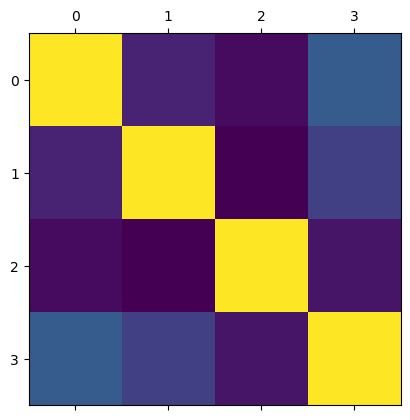

Text(0.5, 1.0, 'Correlation Matrix')

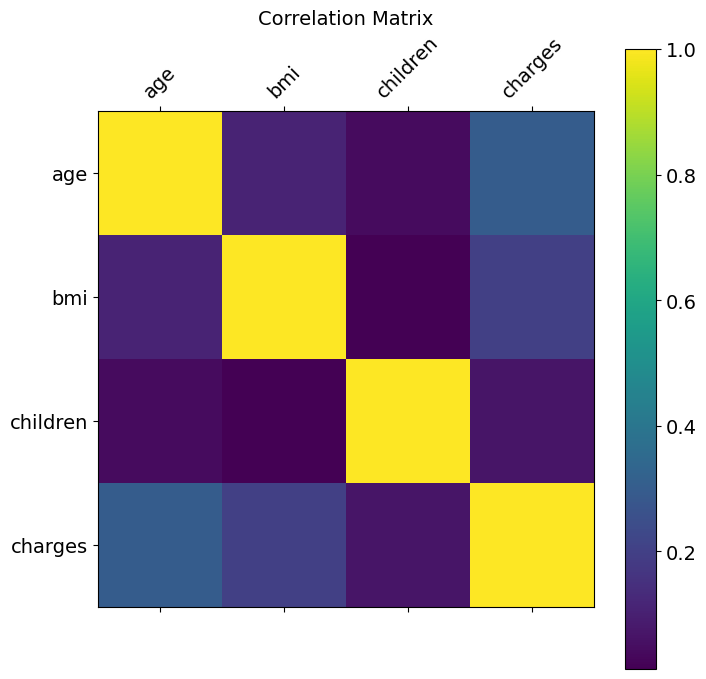

In [25]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

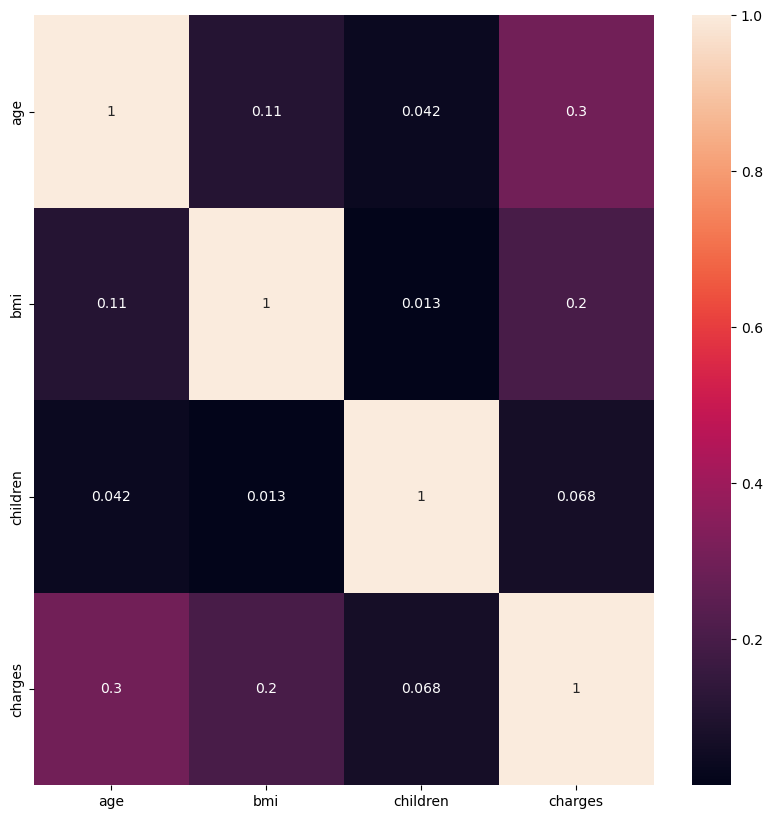

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplot

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


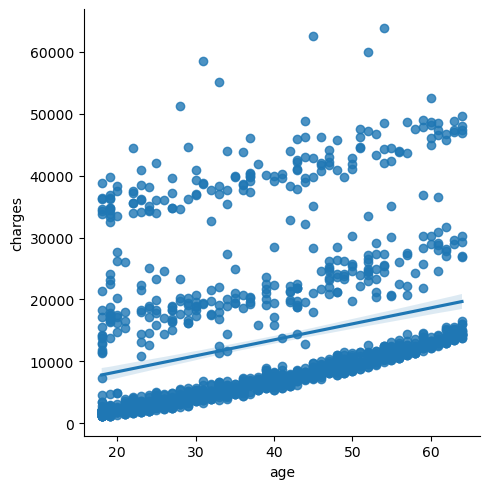

In [23]:
sns.lmplot(x = 'age', y = 'charges', data = df)

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


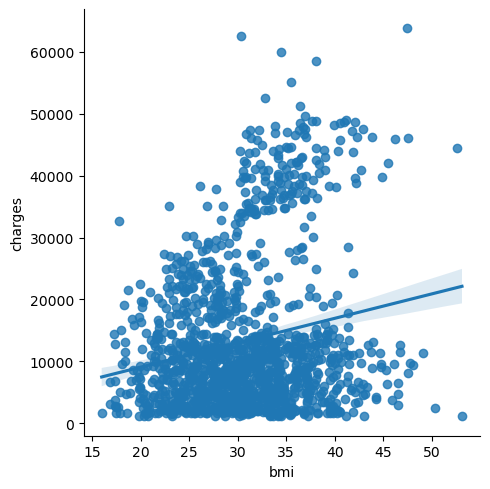

In [26]:
sns.lmplot(x = 'bmi', y = 'charges', data = df)

### Pair Plot

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


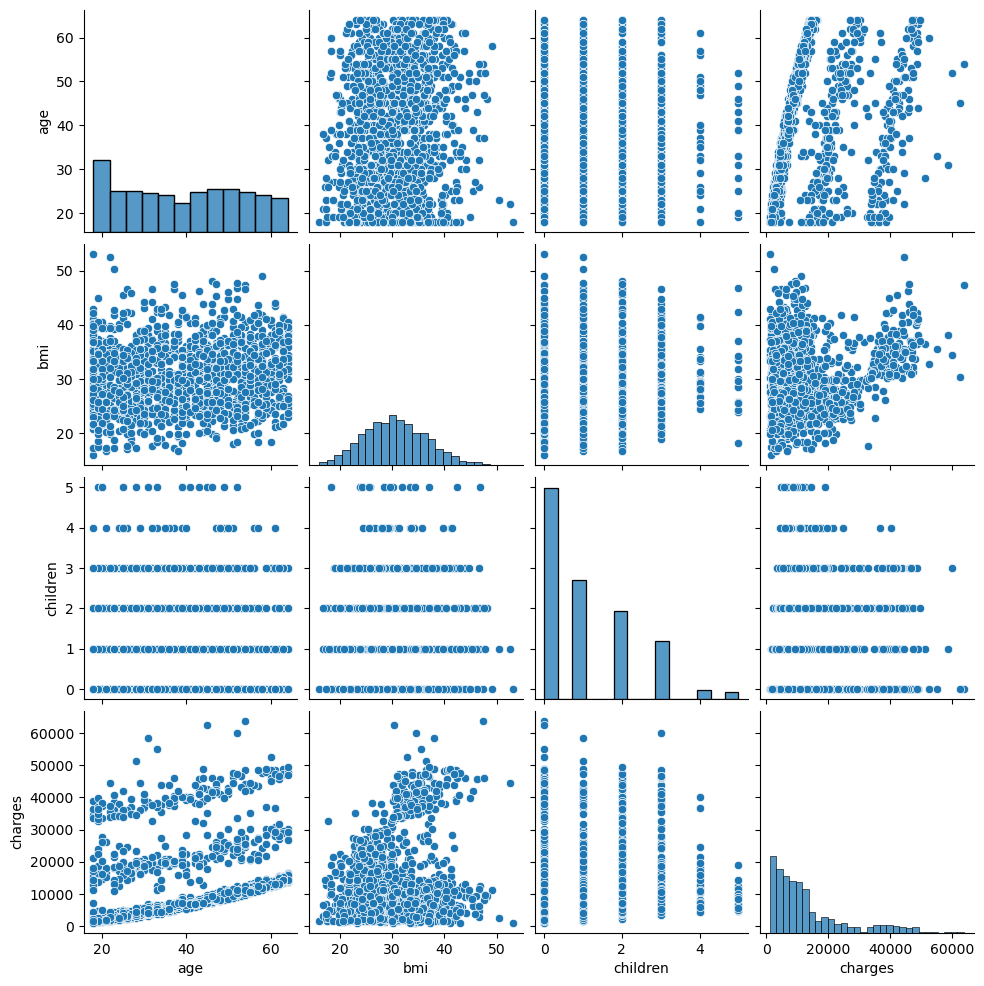

In [27]:
# Create a pair plot 

g = sns.pairplot(df)

### Categorical Plots

<Axes: xlabel='age', ylabel='Count'>

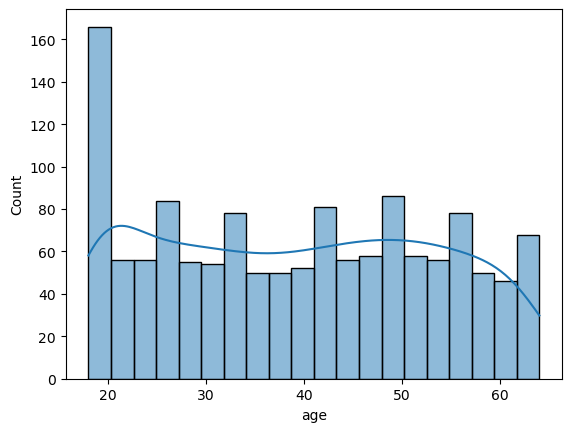

In [28]:
# Use a histogram to visualize the distribution of the variables. 


sns.histplot(df['age'], bins = 20, kde = True)

In [29]:
df.loc[df['age'] < 30, 'age category'] = 'young'

/var/folders/zk/lxc3sp7n5rqf4k_sl172k5xh0000gn/T/ipykernel_63700/2704442527.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'young' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['age'] < 30, 'age category'] = 'young'


In [31]:
df.loc[(df['age'] >= 30) & (df['age'] < 50), 'age category'] = 'Middle age'

In [32]:
df.loc[df['age'] >= 50, 'age category'] = 'older'

In [33]:
df['age category'].value_counts(dropna = False)

age category
Middle age    536
young         417
older         385
Name: count, dtype: int64

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


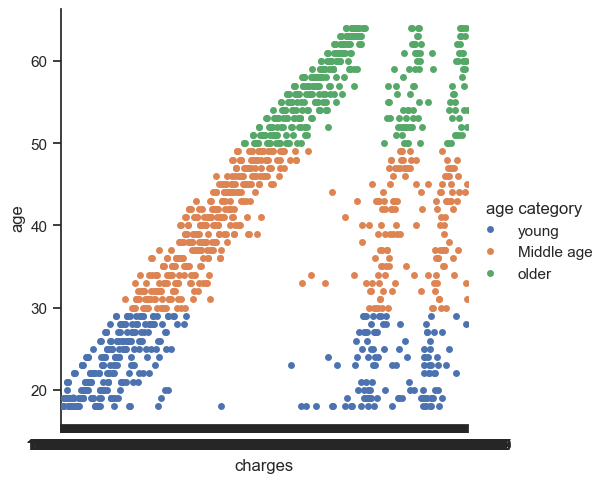

In [34]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="charges", y="age", hue="age category", data=df)

/Users/emilypickett/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


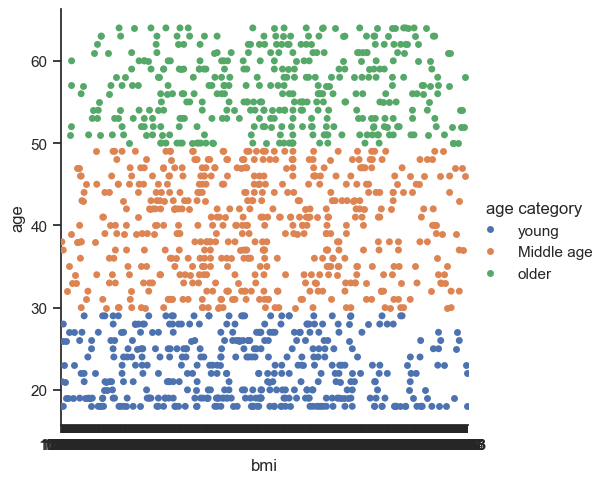

In [35]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="bmi", y="age", hue="age category", data=df)